### Exploratory Analysis

The main idea is to apply some quantitative trading to the Crypto-sphere and to see if we can create some trading strategies with decent $\alpha$. In the future, it may be possible to run the mutual fund using both algorithmic trading and manual trading (via. Will's domain knowledge).

In order to start algorithmically trading, we need to first decide which currencies that we are willing to trade. We will also need to create a market index to use as the baseline for measuring how well a strategy is actually performing. 

#### Establishing a Market Index

From [Investopedia](https://www.investopedia.com/terms/m/marketindex.asp#ixzz555QvCO80):

`
A market index is an aggregate value produced by combining several stocks or other investment vehicles together and expressing their total values against a base value from a specific date. Market indexes are intended to represent an entire stock market and thus track the market's changes over time. 
`

We will choose coins for the index based on their individual market caps; this approach allows us to get a good measurement for the coin markets while keeping the total number of coins in our portfolio small. Data is collected from calling the CoinMarketCap API.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


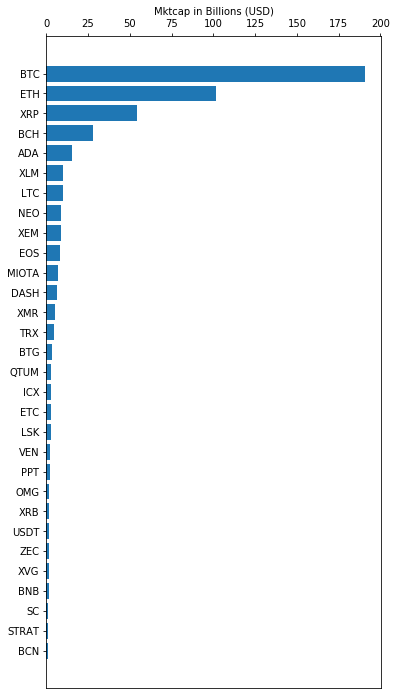

In [84]:
%matplotlib inline

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N_COINS = 30

json = requests.get(f'https://api.coinmarketcap.com/v1/ticker/?limit={N_COINS}').json()
df = pd.DataFrame(json)
df = df[['rank', 'symbol', 'price_usd', 'market_cap_usd', 
         '24h_volume_usd', 'percent_change_24h', 'percent_change_7d']]
df = df.convert_objects(convert_numeric=True)

fig, ax = plt.subplots(figsize=(6, 12))

ax.barh(df['rank'], df['market_cap_usd']/10**9)
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel('Mktcap in Billions (USD)')
plt.setp(ax, yticks=np.arange(1, N_COINS+1), yticklabels=df['symbol'])

#ax.set_xticklabels(df["symbol"])

plt.show()


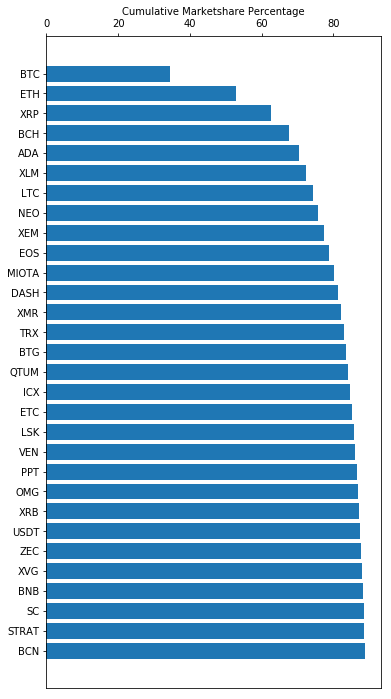

0     34.527324
1     52.876372
2     62.653802
3     67.754753
4     70.529599
5     72.375372
6     74.190731
7     75.829065
8     77.395140
9     78.901967
10    80.180042
11    81.292316
12    82.196358
13    83.006828
14    83.598882
15    84.151621
16    84.703676
17    85.235243
18    85.711099
19    86.135662
20    86.494218
21    86.815664
22    87.130539
23    87.423751
24    87.682549
25    87.933276
26    88.183410
27    88.412840
28    88.641589
29    88.860415
Name: market_cap_usd, dtype: float64


In [87]:
json = requests.get('https://api.coinmarketcap.com/v1/global/').json()

total_mkt_cap = json['total_market_cap_usd']

fig, ax = plt.subplots(figsize=(6, 12))
ax.barh(df['rank'], 100*df['market_cap_usd'].cumsum()/total_mkt_cap)
ax.invert_yaxis()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlabel('Cumulative Marketshare Percentage')
plt.setp(ax, yticks=np.arange(1, N_COINS+1), yticklabels=df['symbol'])

#ax.set_xticklabels(df["symbol"])

plt.show()

print((100*df['market_cap_usd'].cumsum()/total_mkt_cap))

By adjusting the `N_COINS` variable, we can see that the top 100 coins makes up approximately 95% of the market cap, while the top 5, 10, and 35 make up 70%, 80%, and 90% respectively. 